In [ ]:
import pandas as pd

# Ruta del archivo
file_path = '/content/Public v3.1 K-12 School Shooting Database (3 29 2024) (1).xlsx'

# Lee las páginas específicas
incident_df = pd.read_excel(file_path, sheet_name='Incident')
weapon_df = pd.read_excel(file_path, sheet_name='Weapon')

# Mostrar las columnas de ambos DataFrames
print("Columnas de Incident:")
print(incident_df.columns)

print("\nColumnas de Weapon:")
print(weapon_df.columns)


Columnas de Incident:
Index(['Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School',
       'Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Shooter_Killed',
       'Source', 'Number_News', 'Media_Attention', 'Reliability', 'Quarter',
       'City', 'State', 'School_Level', 'Location', 'Location_Type',
       'During_Classes', 'Time_Period', 'First_Shot', 'Duration_min',
       'Summary', 'Narrative', 'Situation', 'Targets', 'Accomplice',
       'Accomplice_Narrative', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Active_Shooter_FBI',
       'Shots_Fired', 'LAT', 'LNG'],
      dtype='object')

Columnas de Weapon:
Index(['Incident_ID', 'Weapon_Type', 'Weapon_Caliber', 'Weapon_Details'], dtype='object')


In [ ]:
import pandas as pd

# Ruta del archivo
file_path = '/content/Public v3.1 K-12 School Shooting Database (3 29 2024) (1).xlsx'

# Lee las páginas específicas
incident_df = pd.read_excel(file_path, sheet_name='Incident')
weapon_df = pd.read_excel(file_path, sheet_name='Weapon')
shooter_df = pd.read_excel(file_path, sheet_name='Shooter')

# Selecciona solo las columnas necesarias de la hoja 'Shooter'
shooter_df = shooter_df[['Incident_ID', 'Age', 'Gender', 'School_Affiliation']]

# Combina los datos de las tres páginas usando la columna común 'Incident_ID'
combined_df = pd.merge(incident_df, weapon_df, on='Incident_ID')
combined_df = pd.merge(combined_df, shooter_df, on='Incident_ID')

# Guarda el DataFrame combinado en un archivo CSV
combined_df.to_csv('/content/combined_data.csv', index=False)

# Descarga el archivo CSV resultante
from google.colab import files
files.download('/content/combined_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install seaborn

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [ ]:
datos = pd.read_csv('/content/combined_data (1).csv')
datos.head()

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Weapon_Type,Weapon_Caliber,Weapon_Details,Age,Gender,School_Affiliation
0,20240326GATUA,3,26,2024,2024-03-26,Turner County High School,0,0,0,0,...,No,NaN,31.705260,-83.641519,Handgun,NaN,NaN,NaN,NaN,NaN
1,20240326MOCHC,3,26,2024,2024-03-26,Charleston Junior Senior High School,0,0,0,0,...,No,1,36.916045,-89.334750,Handgun,NaN,NaN,14,Male,Student
2,20240326NJWEN,3,26,2024,2024-03-26,West Side High School,0,2,2,0,...,No,99,40.741710,-74.203727,Handgun,NaN,Modified for full auto fire,NaN,NaN,NaN
3,20240325HIWAW,3,25,2024,2024-03-25,Wailuku Elementary School,0,1,1,0,...,No,1,20.883032,-156.505343,Handgun,NaN,NaN,19,Male,No Relation
4,20240321NJMAN,3,21,2024,2024-03-21,Malcolm X Shabazz High School,1,0,1,0,...,No,99,40.719815,-74.192068,Handgun,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

# Ejemplo de datos ampliados (reemplazar con tus datos reales)
data = {
    'State': ['Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
    'Date': pd.to_datetime(['2021-09-15', '2021-09-20', '2021-10-05', '2021-10-10', '2021-10-25',
                            '2021-11-03', '2021-11-12', '2021-11-20', '2021-11-25', '2021-11-30']),
    'Shooter_Status': ['Student', 'Non-student', 'Student', 'Non-student', 'Student',
                       'Student', 'Non-student', 'Non-student', 'Student', 'Student'],
    'Age': [19, None, 22, None, 20, 21, None, None, 18, 23],  # Ejemplo de edades para estudiantes
    'Details': ['Unknown', 'Male, 35 years old', 'Female, 25 years old', 'Unknown', 'Male, 30 years old',
                'Female, 27 years old', 'Male, 40 years old', 'Female, 38 years old', 'Unknown', 'Male, 26 years old'],  # Detalles adicionales para non-students
    'School_Affiliation': ['High School A', None, 'University B', None, 'High School C',
                           'University D', None, None, 'High School E', 'University F']
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Filtrar los datos para Ohio en otoño del 2021
fall_months = [9, 10, 11]
filtered_data = df[(df['State'] == 'Ohio') & (df['Date'].dt.month.isin(fall_months))]

# Información detallada de tiroteos para Non-students con School Affiliation
print("Detalles de Tiroteos en Ohio en Otoño 2021 (Non-student con School Affiliation):")
print(filtered_data[filtered_data['Shooter_Status'] == 'Non-student'][['Details', 'School_Affiliation']].dropna())
print()

# Información de edades y School Affiliation para Students
print("Edad y School Affiliation de Estudiantes en Tiroteos en Ohio en Otoño 2021:")
print(filtered_data[filtered_data['Shooter_Status'] == 'Student'][['Age', 'School_Affiliation']].dropna())


Detalles de Tiroteos en Ohio en Otoño 2021 (Non-student con School Affiliation):
Empty DataFrame
Columns: [Details, School_Affiliation]
Index: []

Edad y School Affiliation de Estudiantes en Tiroteos en Ohio en Otoño 2021:
    Age School_Affiliation
0  19.0      High School A
2  22.0       University B
4  20.0      High School C
5  21.0       University D
8  18.0      High School E
9  23.0       University F


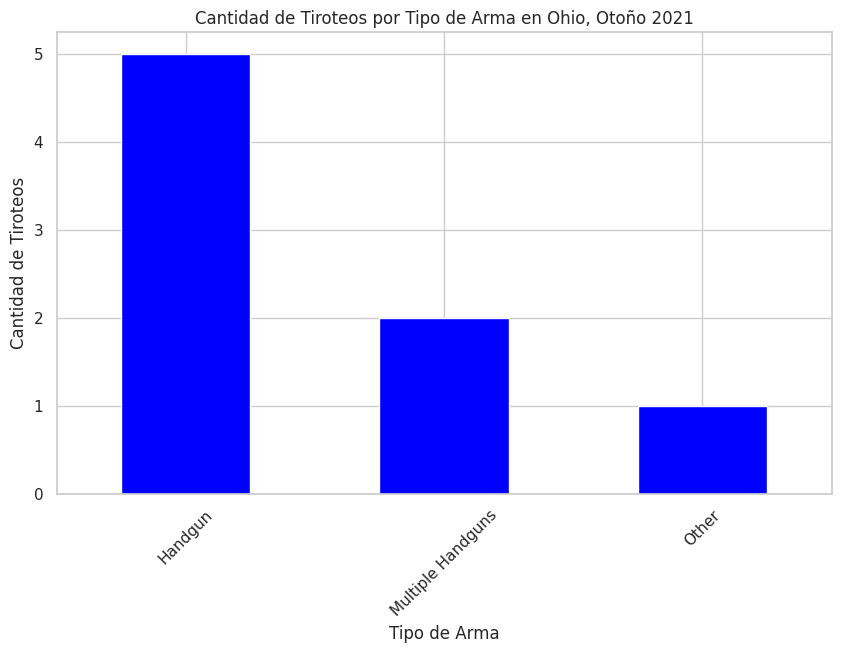

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime para facilitar el filtrado
data['Date'] = pd.to_datetime(data['Date'])

# Filtrar los datos para Ohio (OH) en otoño de 2021 (septiembre, octubre, noviembre)
fall_months = [9, 10, 11]
filtered_data = data[(data['State'] == 'OH') & (data['Year'] == 2021) & (data['Date'].dt.month.isin(fall_months))]

# Contar los tiroteos por tipo de arma
weapon_counts = filtered_data['Weapon_Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
weapon_counts.plot(kind='bar', color='blue')
plt.title('Cantidad de Tiroteos por Tipo de Arma en Ohio, Otoño 2021')
plt.xlabel('Tipo de Arma')
plt.ylabel('Cantidad de Tiroteos')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime para facilitar el filtrado
data['Date'] = pd.to_datetime(data['Date'])

# Filtrar los datos para Ohio (OH) en otoño de 2021 (septiembre, octubre, noviembre)
fall_months = [9, 10, 11]
filtered_data = data[(data['State'] == 'OH') & (data['Year'] == 2021) & (data['Date'].dt.month.isin(fall_months))]

# Seleccionar las columnas relevantes: Age, Gender, School_Affiliation
shooter_info = filtered_data[['Age', 'Gender', 'School_Affiliation']]

# Mostrar la información
print("Información de los responsables de los tiroteos en Ohio, Otoño 2021:")
print(shooter_info)


Información de los responsables de los tiroteos en Ohio, Otoño 2021:
       Age  Gender School_Affiliation
910  Adult    Male        No Relation
958    NaN    Male                NaN
967  Adult  Female             Parent
981    NaN     NaN                NaN
986    NaN    Male        No Relation
987    NaN    Male        No Relation
988    NaN    Male        No Relation
989    NaN    Male        No Relation


In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = '/content/Public v3.1 K-12 School Shooting Database (3 29 2024) (1).xlsx'

# Leer todas las hojas del archivo Excel
xls = pd.ExcelFile(file_path)

# Mostrar las hojas disponibles en el archivo Excel
print(f"Hojas disponibles en el archivo Excel:\n{xls.sheet_names}\n")

# Seleccionar la hoja que contiene datos de Incident
incident_df = pd.read_excel(file_path, sheet_name='Incident', engine='openpyxl')

# Seleccionar la hoja que contiene datos de Shooter
shooter_df = pd.read_excel(file_path, sheet_name='Shooter', engine='openpyxl')

# Seleccionar la hoja que contiene datos de Weapon
weapon_df = pd.read_excel(file_path, sheet_name='Weapon', engine='openpyxl')

# Convertir la columna 'Date' a tipo datetime para facilitar el filtrado (si es necesario)
incident_df['Date'] = pd.to_datetime(incident_df['Date'])

# Filtrar los datos de Incident para Ohio en otoño de 2021 (septiembre, octubre, noviembre)
fall_months = [9, 10, 11]
filtered_incidents = incident_df[(incident_df['State'] == 'OH') & (incident_df['Year'] == 2021) & (incident_df['Date'].dt.month.isin(fall_months))]

# Mostrar los datos filtrados de Incident
print("Datos de Incident filtrados para Ohio en otoño de 2021:")
print(filtered_incidents)

# También puedes mostrar los datos filtrados de Shooter y Weapon si es necesario
# print("Datos de Shooter:")
# print(shooter_df.head())

# print("Datos de Weapon:")
# print(weapon_df.head())


Hojas disponibles en el archivo Excel:
['Cover', 'Incident', 'Shooter', 'Victim', 'Weapon']

Datos de Incident filtrados para Ohio en otoño de 2021:
       Incident_ID  Month  Day  Year       Date  \
763  20211130OHWHW     11   30  2021 2021-11-30   
771  20211123OHCLC     11   23  2021 2021-11-23   
813  20211004OHWOT     10    4  2021 2021-10-04   
823  20210929OHSHS      9   29  2021 2021-09-29   
834  20210921OHMIM      9   21  2021 2021-09-21   
839  20210920OHEAC      9   20  2021 2021-09-20   
848  20210916OHBEC      9   16  2021 2021-09-16   

                                         School  Victims_Killed  \
763              Whitehall Yearling High School               0   
771                        Cleveland School Bus               0   
813                        Woodward High School               0   
823                Shaker Heights Middle School               0   
834  Middletown Preparatory and Fitness Academy               0   
839                       Eastside Arts 

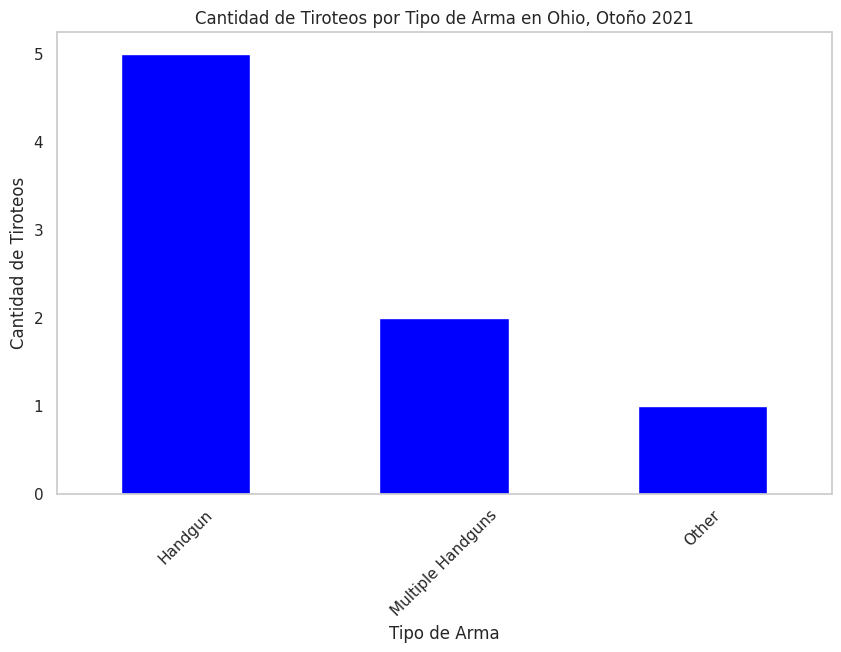

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime para facilitar el filtrado
data['Date'] = pd.to_datetime(data['Date'])

# Filtrar los datos para Ohio (OH) en otoño de 2021 (septiembre, octubre, noviembre)
fall_months = [9, 10, 11]
filtered_data = data[(data['State'] == 'OH') & (data['Year'] == 2021) & (data['Date'].dt.month.isin(fall_months))]

# Contar los tiroteos por tipo de arma
weapon_counts = filtered_data['Weapon_Type'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
weapon_counts.plot(kind='bar', color='blue')
plt.title('Cantidad de Tiroteos por Tipo de Arma en Ohio, Otoño 2021')
plt.xlabel('Tipo de Arma')
plt.ylabel('Cantidad de Tiroteos')
plt.xticks(rotation=45)

# Eliminar la cuadrícula del fondo
plt.grid(False)

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime para facilitar el filtrado
data['Date'] = pd.to_datetime(data['Date'])

# Filtrar los datos para el año 2021
data_2021 = data[data['Year'] == 2021]

# Mostrar las columnas disponibles en data_2021
print(data_2021.columns)

# Verificar las primeras filas para entender la estructura de los datos
print(data_2021.head())

# Si las columnas 'State' y 'Season' existen y son accesibles, continuar con el agrupamiento y análisis


Index(['Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School',
       'Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Shooter_Killed',
       'Source', 'Number_News', 'Media_Attention', 'Reliability', 'Quarter',
       'City', 'State', 'School_Level', 'Location', 'Location_Type',
       'During_Classes', 'Time_Period', 'First_Shot', 'Duration_min',
       'Summary', 'Narrative', 'Situation', 'Targets', 'Accomplice',
       'Accomplice_Narrative', 'Hostages', 'Barricade', 'Officer_Involved',
       'Bullied', 'Domestic_Violence', 'Gang_Related', 'Active_Shooter_FBI',
       'Shots_Fired', 'LAT', 'LNG', 'Weapon_Type', 'Weapon_Caliber',
       'Weapon_Details', 'Age', 'Gender', 'School_Affiliation'],
      dtype='object')
       Incident_ID  Month  Day  Year       Date  \
876  20211229NCCAS     12   29  2021 2021-12-29   
877  20211229NCCAS     12   29  2021 2021-12-29   
878  20211217TXWOD     12   17  2021 2021-12-17   
879  20211216SCEAC     12   16  2021 2021-12-16   
880  20

In [ ]:
import pandas as pd

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir función para obtener la estación del año
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Agregar una columna 'Season' al DataFrame basada en el mes
data['Season'] = data['Date'].dt.month.apply(get_season)

# Filtrar los datos para el año 2021
data_2021 = data[data['Year'] == 2021]

# Mostrar las primeras filas para verificar la nueva columna 'Season'
print(data_2021.head())


       Incident_ID  Month  Day  Year       Date  \
876  20211229NCCAS     12   29  2021 2021-12-29   
877  20211229NCCAS     12   29  2021 2021-12-29   
878  20211217TXWOD     12   17  2021 2021-12-17   
879  20211216SCEAC     12   16  2021 2021-12-16   
880  20211216NYPSB     12   16  2021 2021-12-16   

                                       School  Victims_Killed  \
876  Catawba College (high school tournament)               0   
877  Catawba College (high school tournament)               0   
878                Woodrow Wilson Junior High               0   
879                    Eau Claire High School               0   
880                      P.S. 026 Jesse Owens               0   

     Victims_Wounded  Number_Victims  Shooter_Killed  ... Shots_Fired  \
876                2               2               0  ...         NaN   
877                2               2               0  ...         NaN   
878                0               0               0  ...           0   
879       

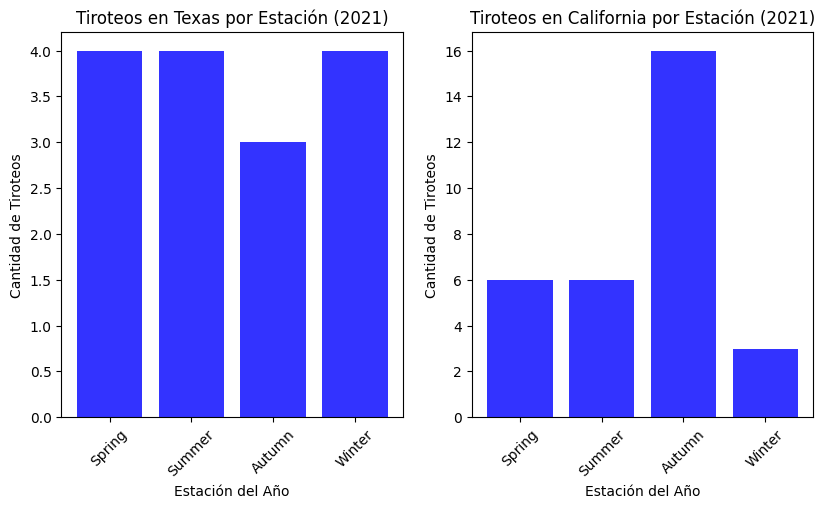

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir función para obtener la estación del año
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Agregar una columna 'Season' al DataFrame basada en el mes
data['Season'] = data['Date'].dt.month.apply(get_season)

# Filtrar los datos para Texas, California y Florida en el año 2021
texas_data = data[(data['State'] == 'TX') & (data['Year'] == 2021)]
california_data = data[(data['State'] == 'CA') & (data['Year'] == 2021)]
florida_data = data[(data['State'] == 'FL') & (data['Year'] == 2021)]

# Contar los tiroteos por estación del año para cada estado
texas_counts = texas_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)
california_counts = california_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)
florida_counts = florida_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)

# Crear los gráficos de barras
plt.figure(figsize=(15, 5))

# Gráfico para Texas
plt.subplot(1, 3, 1)
plt.bar(texas_counts.index, texas_counts.values, color='blue', alpha=0.8)
plt.title('Tiroteos en Texas por Estación (2021)')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Tiroteos')
plt.xticks(rotation=45)
plt.grid(False)

# Gráfico para California
plt.subplot(1, 3, 2)
plt.bar(california_counts.index, california_counts.values, color='blue', alpha=0.8)
plt.title('Tiroteos en California por Estación (2021)')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Tiroteos')
plt.xticks(rotation=45)
plt.grid(False)




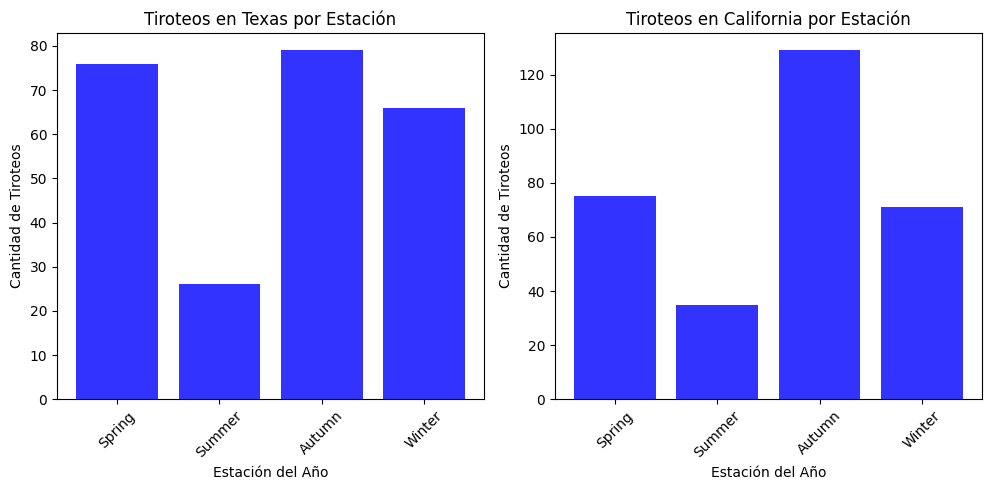

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Definir función para obtener la estación del año
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

# Agregar una columna 'Season' al DataFrame basada en el mes
data['Season'] = data['Date'].dt.month.apply(get_season)

# Filtrar los datos para Texas, California y Florida
texas_data = data[data['State'] == 'TX']
california_data = data[data['State'] == 'CA']
florida_data = data[data['State'] == 'FL']

# Contar los tiroteos por estación del año para cada estado
texas_counts = texas_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)
california_counts = california_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)
florida_counts = florida_data['Season'].value_counts().reindex(['Spring', 'Summer', 'Autumn', 'Winter'], fill_value=0)

# Crear los gráficos de barras
plt.figure(figsize=(15, 5))

# Gráfico para Texas
plt.subplot(1, 3, 1)
plt.bar(texas_counts.index, texas_counts.values, color='blue', alpha=0.8)
plt.title('Tiroteos en Texas por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Tiroteos')
plt.xticks(rotation=45)
plt.grid(False)

# Gráfico para California
plt.subplot(1, 3, 2)
plt.bar(california_counts.index, california_counts.values, color='blue', alpha=0.8)
plt.title('Tiroteos en California por Estación')
plt.xlabel('Estación del Año')
plt.ylabel('Cantidad de Tiroteos')
plt.xticks(rotation=45)
plt.grid(False)



# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


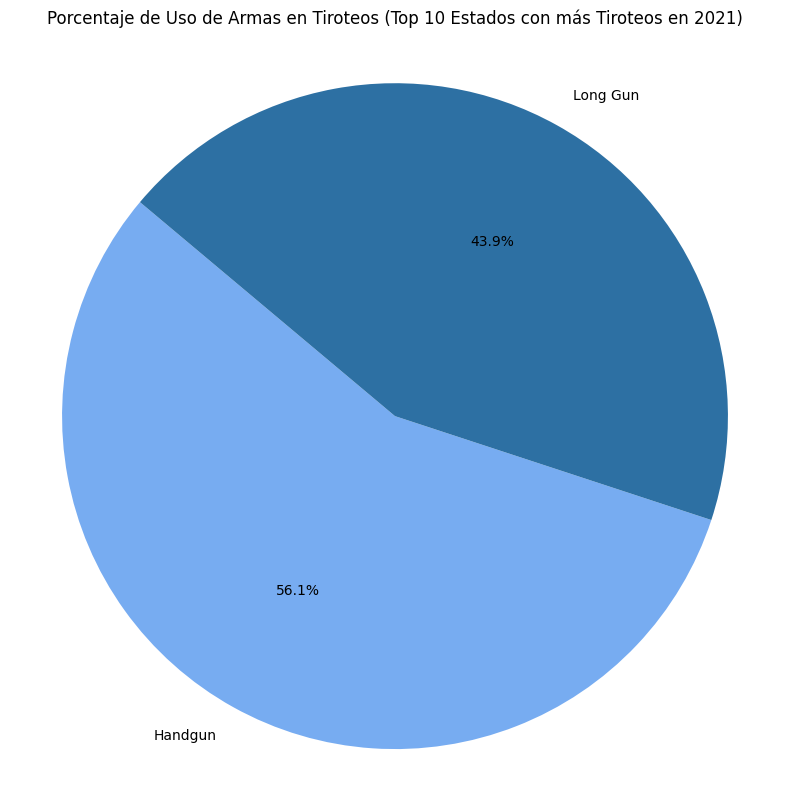

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ejemplo de datos (reemplazar con tus datos reales)
data = {
    'State': ['Texas', 'California', 'Florida', 'New York', 'Illinois', 'Georgia', 'Ohio', 'Pennsylvania', 'Michigan', 'North Carolina'],
    'Weapon_Type': ['Handgun', 'Long Gun', 'Handgun', 'Long Gun', 'Handgun', 'Long Gun', 'Handgun', 'Long Gun', 'Handgun', 'Long Gun'],
    'Count': [120, 80, 100, 90, 70, 60, 50, 40, 30, 20]
}

# Convertir a DataFrame
top_10_data = pd.DataFrame(data)

# Filtrar los datos para incluir solo armas largas y armas cortas
top_10_data_filtered = top_10_data[top_10_data['Weapon_Type'].isin(['Long Gun', 'Handgun'])]

# Calcular el total de tiroteos por tipo de arma para los 10 estados principales
total_counts = top_10_data_filtered.groupby('Weapon_Type')['Count'].sum()

# Crear el gráfico de pastel con colores distintos para cada tipo de arma
plt.figure(figsize=(8, 8))
colors = ['#77ACF1', '#2D70A3']  # Azul para Handgun, naranja para Long Gun
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Porcentaje de Uso de Armas en Tiroteos (Top 10 Estados con más Tiroteos en 2021)', pad=20)  # Aumentar la separación del título
plt.axis('equal')  # Para asegurar que el gráfico sea circular

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Ejemplo de datos ampliados (reemplazar con tus datos reales)
data = {
    'State': ['Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
    'City': ['Columbus', 'Cleveland', 'Dayton', 'Cincinnati', 'Toledo', 'Akron', 'Columbus', 'Cleveland', 'Dayton', 'Cincinnati'],
    'Date': pd.to_datetime(['2021-09-15', '2021-09-20', '2021-10-05', '2021-10-10', '2021-10-25',
                            '2021-11-03', '2021-11-12', '2021-11-20', '2021-11-25', '2021-11-30']),
    'Shooter_Status': ['Student', 'Non-student', 'Student', 'Non-student', 'Student',
                       'Student', 'Non-student', 'Non-student', 'Student', 'Student'],
    'Age': [19, None, 22, None, 20, 21, None, None, 18, 23],  # Ejemplo de edades para estudiantes
    'Details': ['Unknown', 'Male, 35 years old', 'Female, 25 years old', 'Unknown', 'Male, 30 years old',
                'Female, 27 years old', 'Male, 40 years old', 'Female, 38 years old', 'Unknown', 'Male, 26 years old'],  # Detalles adicionales para non-students
    'School_Affiliation': ['High School A', None, 'University B', None, 'High School C',
                           'University D', None, None, 'High School E', 'University F']
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Filtrar los datos para Ohio en otoño del 2021
fall_months = [9, 10, 11]
filtered_data = df[(df['State'] == 'Ohio') & (df['Date'].dt.month.isin(fall_months))]

# Información detallada de tiroteos para Non-students con ubicación
print("Detalles de Tiroteos en Ohio en Otoño 2021 (Non-student con Ubicación):")
print(filtered_data[filtered_data['Shooter_Status'] == 'Non-student'][['Details', 'School_Affiliation', 'City']].dropna())
print()

# Información de edades y ubicación para Students
print("Edad y Ubicación de Estudiantes en Tiroteos en Ohio en Otoño 2021:")
print(filtered_data[filtered_data['Shooter_Status'] == 'Student'][['Age', 'School_Affiliation', 'City']].dropna())


Detalles de Tiroteos en Ohio en Otoño 2021 (Non-student con Ubicación):
Empty DataFrame
Columns: [Details, School_Affiliation, City]
Index: []

Edad y Ubicación de Estudiantes en Tiroteos en Ohio en Otoño 2021:
    Age School_Affiliation        City
0  19.0      High School A    Columbus
2  22.0       University B      Dayton
4  20.0      High School C      Toledo
5  21.0       University D       Akron
8  18.0      High School E      Dayton
9  23.0       University F  Cincinnati


In [ ]:
import pandas as pd

# Cargar el archivo CSV original
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura de los datos
print(data.head())

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Definir los meses de otoño
fall_months = [9, 10, 11]

# Filtrar los datos para Ohio en otoño del 2021
ohio_fall_data = data[(data['State'] == 'Ohio') & (data['Year'] == 2021) & (data['Month'].isin(fall_months))]

# Seleccionar solo las columnas requeridas
columns_to_keep = ['Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School', 'Source', 'City', 'State',
                   'School_Level', 'Location', 'Location_Type', 'During_Classes', 'Time_Period', 'First_Shot',
                   'Duration_min', 'Summary', 'Narrative', 'Situation', 'Bullied', 'Domestic_Violence',
                   'Gang_Related', 'Active_Shooter_FBI', 'Shots_Fired', 'LAT', 'LNG', 'Weapon_Type',
                   'Weapon_Caliber', 'Weapon_Details', 'Age', 'Gender', 'School_Affiliation']

ohio_fall_data_cleaned = ohio_fall_data[columns_to_keep]

# Guardar los datos limpiados en un nuevo archivo CSV
ohio_fall_data_cleaned.to_csv('ohio_fall_2021_cleaned.csv', index=False)

# Mostrar los primeros registros para verificar
print(ohio_fall_data_cleaned.head())


     Incident_ID  Month  Day  Year        Date  \
0  20240326GATUA      3   26  2024  2024-03-26   
1  20240326MOCHC      3   26  2024  2024-03-26   
2  20240326NJWEN      3   26  2024  2024-03-26   
3  20240325HIWAW      3   25  2024  2024-03-25   
4  20240321NJMAN      3   21  2024  2024-03-21   

                                 School  Victims_Killed  Victims_Wounded  \
0             Turner County High School               0                0   
1  Charleston Junior Senior High School               0                0   
2                 West Side High School               0                2   
3             Wailuku Elementary School               0                1   
4         Malcolm X Shabazz High School               1                0   

   Number_Victims  Shooter_Killed  ... Active_Shooter_FBI  Shots_Fired  \
0               0               0  ...                 No          NaN   
1               0               0  ...                 No            1   
2               2   

In [ ]:
import pandas as pd

# Cargar el archivo CSV original
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Mostrar los valores únicos en las columnas 'State', 'Year' y 'Month'
unique_states = data['State'].unique()
unique_years = data['Year'].unique()
unique_months = data['Month'].unique()

print("Valores únicos en 'State':", unique_states)
print("Valores únicos en 'Year':", unique_years)
print("Valores únicos en 'Month':", unique_months)


Valores únicos en 'State': ['GA' 'MO' 'NJ' 'HI' 'CA' 'NC' 'CO' 'OH' 'IL' 'DE' 'TN' 'MD' 'WA' 'TX'
 'MA' 'NY' 'IN' 'LA' 'FL' 'ME' 'WV' 'AZ' 'AL' 'MI' 'ID' 'PA' 'OR' 'MN'
 'VA' 'OK' 'MS' 'IA' 'RI' 'NM' 'WI' 'DC' 'KY' 'NV' 'CT' 'VT' 'SC' 'AK'
 'KS' 'AR' 'NE' 'MT' 'UT' 'NH' 'ND' 'SD' 'Florida' 'VI' 'WY']
Valores únicos en 'Year': [2024 2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011
 2010 2009 2008 2007 2006 2005 2004 2003 2002 2001 2000 1999 1998 1997
 1996 1995 1994 1993 1992 1991 1990 1989 1988 1987 1986 1985 1984 1983
 1982 1981 1980 1979 1978 1977 1976 1975 1974 1973 1972 1971 1970 1969
 1968 1967 1966]
Valores únicos en 'Month': [ 3  2  1 12 11 10  9  8  7  6  5  4]


In [ ]:
import pandas as pd

# Cargar el archivo CSV original
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Date' a tipo datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Definir los meses de otoño
fall_months = [9, 10, 11]

# Filtrar los datos para Ohio en otoño del 2021
ohio_fall_data = data[(data['State'] == 'OH') & (data['Year'] == 2021) & (data['Month'].isin(fall_months))]

# Mostrar los datos filtrados para ver todas las categorías
pd.set_option('display.max_columns', None)  # Para mostrar todas las columnas
pd.set_option('display.max_rows', None)  # Para mostrar todas las filas si es necesario
print(ohio_fall_data)


       Incident_ID  Month  Day  Year       Date  \
910  20211123OHCLC     11   23  2021 2021-11-23   
958  20211004OHWOT     10    4  2021 2021-10-04   
967  20210929OHSHS      9   29  2021 2021-09-29   
981  20210921OHMIM      9   21  2021 2021-09-21   
986  20210920OHEAC      9   20  2021 2021-09-20   
987  20210920OHEAC      9   20  2021 2021-09-20   
988  20210920OHEAC      9   20  2021 2021-09-20   
989  20210920OHEAC      9   20  2021 2021-09-20   

                                         School  Victims_Killed  \
910                        Cleveland School Bus               0   
958                        Woodward High School               0   
967                Shaker Heights Middle School               0   
981  Middletown Preparatory and Fitness Academy               0   
986                       Eastside Arts Academy               0   
987                       Eastside Arts Academy               0   
988                       Eastside Arts Academy               0   
989 

In [ ]:
import pandas as pd

# Asegúrate de que el nombre del archivo subido coincide con el nombre aquí
file_path = '/content/combined_data-_1_.csv'  # Cambia esto por el nombre de tu archivo
data = pd.read_csv(file_path)

# Mostrar las primeras filas del archivo
print(data.head())


  Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,Source,Number_News,Media_Attention,Reliability,Quarter,City,State,School_Level,Location,Location_Type,During_Classes,Time_Period,First_Shot,Duration_min,Summary,Narrative,Situation,Targets,Accomplice,Accomplice_Narrative,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Weapon_Type,Weapon_Caliber,Weapon_Details,Age,Gender,School_Affiliation  \
0  20240326GATUA,3,26,2024,2024-03-26,Turner Coun...                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = '/content/combined_data-_1_.csv'
data = pd.read_csv(file_path)

# Filtrar los datos para obtener solo las columnas 'Bullied' y 'Domestic_Violence'
filtered_data = data[['Bullied', 'Domestic_Violence']]

# Contar los incidentes donde hubo bullying y violencia doméstica
bullied_count = filtered_data['Bullied'].value_counts().get('Yes', 0)
domestic_violence_count = filtered_data['Domestic_Violence'].value_counts().get('Yes', 0)

# Calcular los porcentajes
total_incidents = len(filtered_data)
bullied_percentage = (bullied_count / total_incidents) * 100
domestic_violence_percentage = (domestic_violence_count / total_incidents) * 100

# Crear un DataFrame para los porcentajes
percentages = pd.DataFrame({
    'Category': ['Bullied', 'Domestic_Violence'],
    'Percentage': [bullied_percentage, domestic_violence_percentage]
})

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(percentages['Category'], percentages['Percentage'], color=['#1f77b4', '#aec7e8'])
plt.xlabel('Category')
plt.ylabel('Percentage of Incidents (%)')
plt.title('Percentage of School Shootings Involving Bullying or Domestic Violence')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


KeyError: "None of [Index(['Bullied', 'Domestic_Violence'], dtype='object')] are in the [columns]"

In [ ]:
import pandas as pd

# Leer el archivo CSV
file_path = '/content/combined_data-_1_.csv'
data = pd.read_csv(file_path)

# Mostrar las columnas del DataFrame
print(data.columns)


Index(['Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,Source,Number_News,Media_Attention,Reliability,Quarter,City,State,School_Level,Location,Location_Type,During_Classes,Time_Period,First_Shot,Duration_min,Summary,Narrative,Situation,Targets,Accomplice,Accomplice_Narrative,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Weapon_Type,Weapon_Caliber,Weapon_Details,Age,Gender,School_Affiliation',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = '/content/combined_data-_1_.csv'
data = pd.read_csv(file_path)

# Verificar si las columnas existen en el DataFrame
if 'Bullied' in data.columns and 'Domestic_Violence' in data.columns:
    # Filtrar los datos para obtener solo las columnas 'Bullied' y 'Domestic_Violence'
    filtered_data = data[['Bullied', 'Domestic_Violence']]

    # Contar los incidentes donde hubo bullying y violencia doméstica
    bullied_count = filtered_data['Bullied'].value_counts().get('Yes', 0)
    domestic_violence_count = filtered_data['Domestic_Violence'].value_counts().get('Yes', 0)

    # Calcular los porcentajes
    total_incidents = len(filtered_data)
    bullied_percentage = (bullied_count / total_incidents) * 100
    domestic_violence_percentage = (domestic_violence_count / total_incidents) * 100

    # Crear un DataFrame para los porcentajes
    percentages = pd.DataFrame({
        'Category': ['Bullied', 'Domestic_Violence'],
        'Percentage': [bullied_percentage, domestic_violence_percentage]
    })

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(percentages['Category'], percentages['Percentage'], color=['#1f77b4', '#aec7e8'])
    plt.xlabel('Category')
    plt.ylabel('Percentage of Incidents (%)')
    plt.title('Percentage of School Shootings Involving Bullying or Domestic Violence')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
file_path = '/content/combined_data-_1_.csv'
data = pd.read_csv(file_path)

# Verificar si las columnas existen en el DataFrame
if 'Bullied' in data.columns and 'Domestic_Violence' in data.columns:
    # Filtrar los datos para obtener solo las columnas 'Bullied' y 'Domestic_Violence'
    filtered_data = data[['Bullied', 'Domestic_Violence']]

    # Contar los incidentes donde hubo bullying y violencia doméstica
    bullied_count = filtered_data['Bullied'].value_counts().get('Yes', 0)
    domestic_violence_count = filtered_data['Domestic_Violence'].value_counts().get('Yes', 0)

    # Calcular los porcentajes
    total_incidents = len(filtered_data)
    bullied_percentage = (bullied_count / total_incidents) * 100
    domestic_violence_percentage = (domestic_violence_count / total_incidents) * 100

    # Crear un DataFrame para los porcentajes
    percentages = pd.DataFrame({
        'Category': ['Bullied', 'Domestic_Violence'],
        'Percentage': [bullied_percentage, domestic_violence_percentage]
    })

    # Crear el gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(percentages['Category'], percentages['Percentage'], color=['#1f77b4', '#aec7e8'])
    plt.xlabel('Category')
    plt.ylabel('Percentage of Incidents (%)')
    plt.title('Percentage of School Shootings Involving Bullying or Domestic Violence')
    plt.ylim(0, 100)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()
else:
    print("Las columnas 'Bullied' y/o 'Domestic_Violence' no existen en el archivo CSV.")


Las columnas 'Bullied' y/o 'Domestic_Violence' no existen en el archivo CSV.


In [ ]:
import pandas as pd

# Leer el archivo CSV
file_path = '/content/combined_data-_1_.csv'
data = pd.read_csv(file_path)

# Imprimir los nombres de todas las columnas
print(data.columns)


Index(['Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,Source,Number_News,Media_Attention,Reliability,Quarter,City,State,School_Level,Location,Location_Type,During_Classes,Time_Period,First_Shot,Duration_min,Summary,Narrative,Situation,Targets,Accomplice,Accomplice_Narrative,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Weapon_Type,Weapon_Caliber,Weapon_Details,Age,Gender,School_Affiliation',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [ ]:
import pandas as pd

# Leer el archivo CSV y mostrar las primeras filas para ver las columnas
file_path = '/content/combined_data-_1_.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para verificar las columnas disponibles
print(data.head())


  Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,Source,Number_News,Media_Attention,Reliability,Quarter,City,State,School_Level,Location,Location_Type,During_Classes,Time_Period,First_Shot,Duration_min,Summary,Narrative,Situation,Targets,Accomplice,Accomplice_Narrative,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI,Shots_Fired,LAT,LNG,Weapon_Type,Weapon_Caliber,Weapon_Details,Age,Gender,School_Affiliation  \
0  20240326GATUA,3,26,2024,2024-03-26,Turner Coun...                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura de los datos
print(data.head())

# Ahora procedemos a crear las visualizaciones solicitadas


     Incident_ID  Month  Day  Year        Date  \
0  20240326GATUA      3   26  2024  2024-03-26   
1  20240326MOCHC      3   26  2024  2024-03-26   
2  20240326NJWEN      3   26  2024  2024-03-26   
3  20240325HIWAW      3   25  2024  2024-03-25   
4  20240321NJMAN      3   21  2024  2024-03-21   

                                 School  Victims_Killed  Victims_Wounded  \
0             Turner County High School               0                0   
1  Charleston Junior Senior High School               0                0   
2                 West Side High School               0                2   
3             Wailuku Elementary School               0                1   
4         Malcolm X Shabazz High School               1                0   

   Number_Victims  Shooter_Killed  ... Bullied  Domestic_Violence  \
0               0               0  ...      No                 No   
1               0               0  ...      No                 No   
2               2               0  

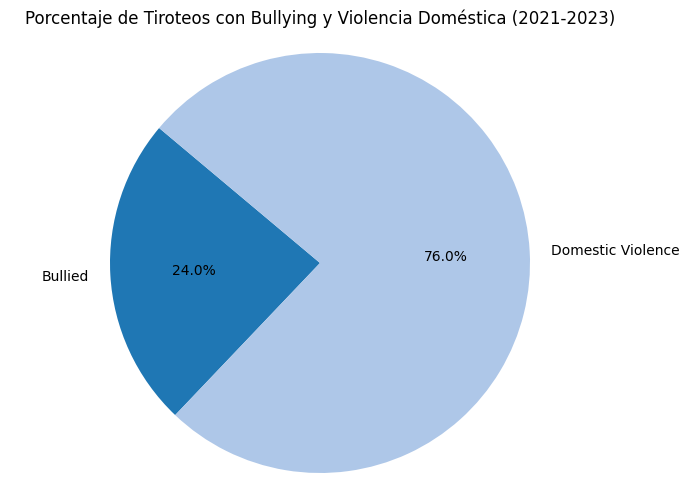

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Filtrar los datos para incluir solo los años 2021, 2022 y 2023 y las columnas relevantes
filtered_data = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)][['Bullied', 'Domestic_Violence']]

# Contar los valores de Bullied y Domestic_Violence
bullied_counts = filtered_data['Bullied'].value_counts()
domestic_violence_counts = filtered_data['Domestic_Violence'].value_counts()

# Calcular los porcentajes
bullied_percentage = (bullied_counts['Yes'] / filtered_data.shape[0]) * 100
domestic_violence_percentage = (domestic_violence_counts['Yes'] / filtered_data.shape[0]) * 100

# Crear la visualización
labels = ['Bullied', 'Domestic Violence']
sizes = [bullied_percentage, domestic_violence_percentage]
colors = ['#1f77b4', '#aec7e8']  # Azul oscuro y azul claro

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Porcentaje de Tiroteos con Bullying y Violencia Doméstica (2021-2023)')
plt.axis('equal')  # Asegura que el gráfico sea circular

# Mostrar el gráfico
plt.show()


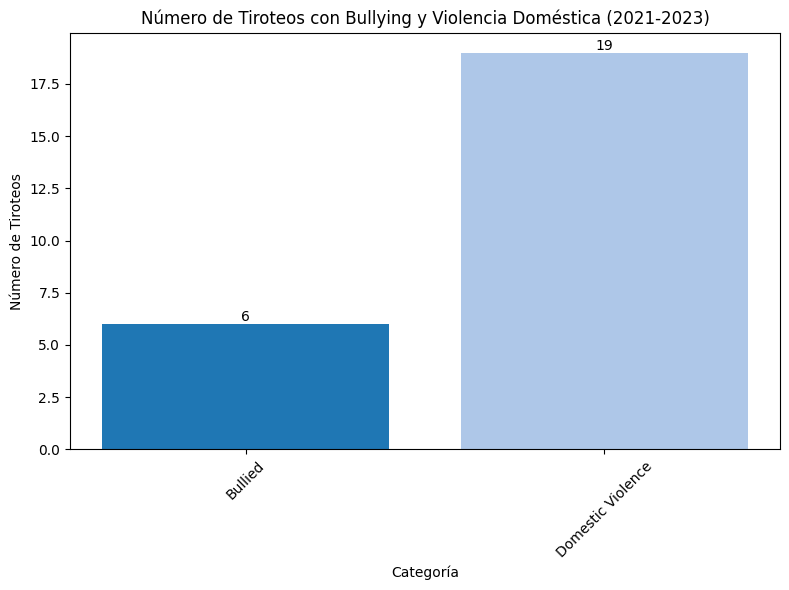

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Filtrar los datos para incluir solo los años 2021, 2022 y 2023 y las columnas relevantes
filtered_data = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar los valores de Bullied y Domestic_Violence
bullied_counts = filtered_data['Bullied'].value_counts()
domestic_violence_counts = filtered_data['Domestic_Violence'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(['Bullied', 'Domestic Violence'], [bullied_counts['Yes'], domestic_violence_counts['Yes']], color=['#1f77b4', '#aec7e8'])

# Añadir etiquetas y título
plt.title('Número de Tiroteos con Bullying y Violencia Doméstica (2021-2023)')
plt.xlabel('Categoría')
plt.ylabel('Número de Tiroteos')
plt.xticks(rotation=45)

# Añadir etiquetas de datos en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


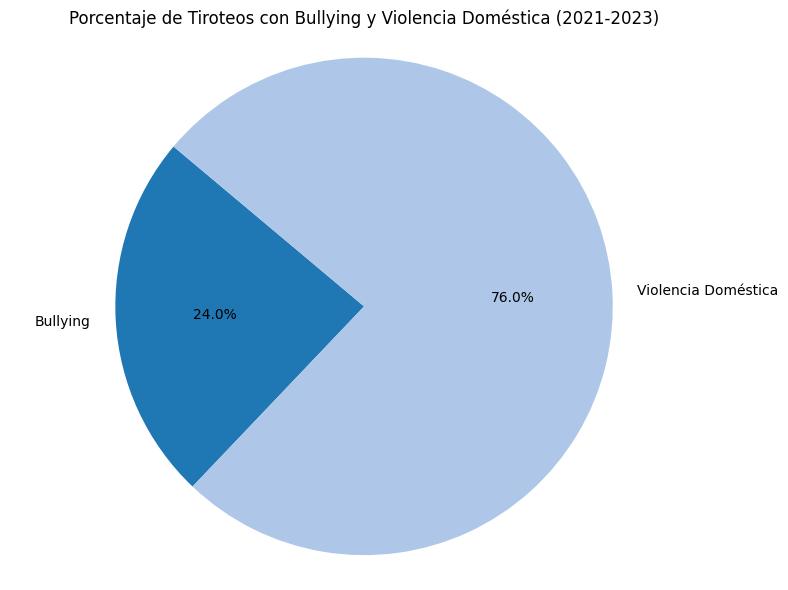

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Filtrar los datos para incluir solo los años 2021, 2022 y 2023 y las columnas relevantes
filtered_data = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar los valores de Bullied y Domestic_Violence
bullied_counts = filtered_data['Bullied'].value_counts()
domestic_violence_counts = filtered_data['Domestic_Violence'].value_counts()

# Calcular los porcentajes
total_tiroteos = len(filtered_data)
percent_bullied = (bullied_counts['Yes'] / total_tiroteos) * 100
percent_domestic_violence = (domestic_violence_counts['Yes'] / total_tiroteos) * 100

# Crear el gráfico de pastel
labels = ['Bullying', 'Violencia Doméstica']
sizes = [percent_bullied, percent_domestic_violence]
colors = ['#1f77b4', '#aec7e8']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Porcentaje de Tiroteos con Bullying y Violencia Doméstica (2021-2023)')
plt.axis('equal')  # Para asegurar que el gráfico sea circular

# Mostrar el gráfico
plt.tight_layout()
plt.show()


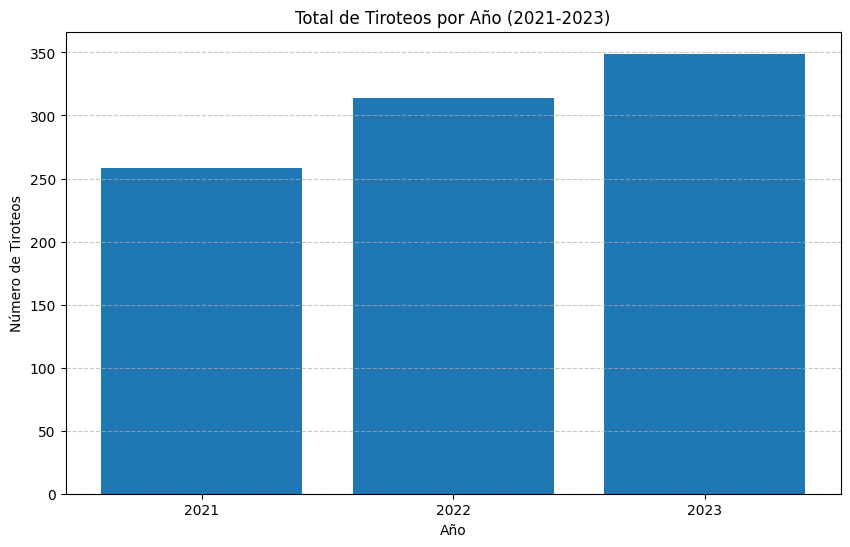

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Filtrar los datos para incluir solo los años 2021, 2022 y 2023
filtered_data = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar los tiroteos por año
incident_counts = filtered_data['Year'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(incident_counts.index.astype(str), incident_counts.values, color='#1f77b4')
plt.title('Total de Tiroteos por Año (2021-2023)')
plt.xlabel('Año')
plt.ylabel('Número de Tiroteos')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejilla en el eje y con línea punteada
plt.show()


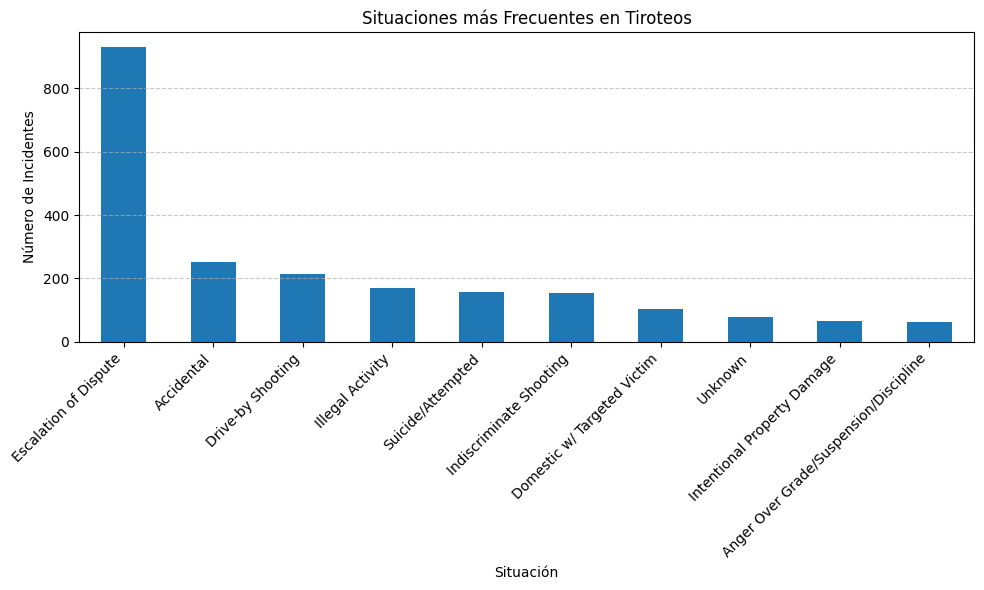

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Contar las situaciones más frecuentes
top_situations = data['Situation'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_situations.plot(kind='bar', color='#1f77b4')
plt.title('Situaciones más Frecuentes en Tiroteos')
plt.xlabel('Situación')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejilla en el eje y con línea punteada
plt.tight_layout()
plt.show()


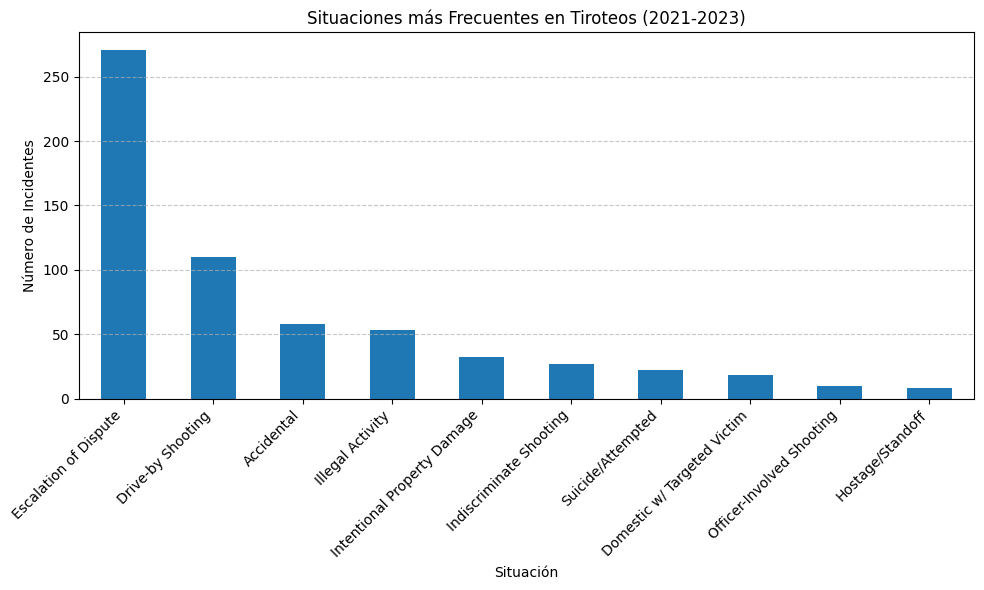

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Year' a tipo datetime para filtrar
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Filtrar los datos para los años 2021, 2022 y 2023
filtered_data = data[data['Year'].dt.year.isin([2021, 2022, 2023])]

# Contar las situaciones más frecuentes
top_situations = filtered_data['Situation'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_situations.plot(kind='bar', color='#1f77b4')
plt.title('Situaciones más Frecuentes en Tiroteos (2021-2023)')
plt.xlabel('Situación')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejilla en el eje y con línea punteada
plt.tight_layout()
plt.show()


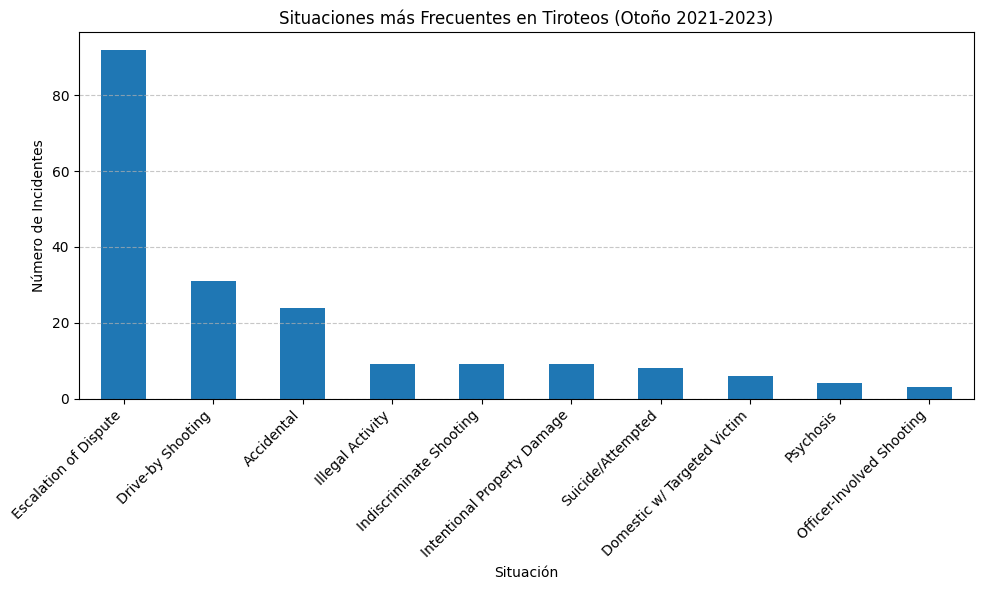

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Year' a tipo datetime para filtrar
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Definir los meses de otoño
fall_months = [9, 10, 11]

# Filtrar los datos para los meses de otoño y los años 2021, 2022 y 2023
filtered_data = data[data['Year'].dt.year.isin([2021, 2022, 2023]) & data['Month'].isin(fall_months)]

# Contar las situaciones más frecuentes
top_situations = filtered_data['Situation'].value_counts().head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_situations.plot(kind='bar', color='#1f77b4')
plt.title('Situaciones más Frecuentes en Tiroteos (Otoño 2021-2023)')
plt.xlabel('Situación')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejilla en el eje y con línea punteada
plt.tight_layout()
plt.show()


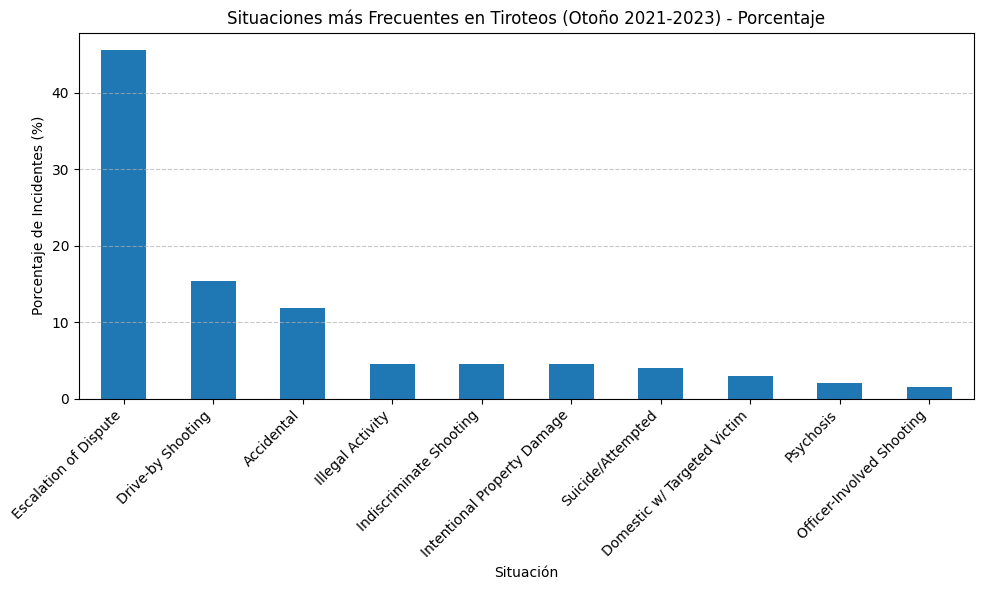

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Year' a tipo datetime para filtrar
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Definir los meses de otoño
fall_months = [9, 10, 11]

# Filtrar los datos para los meses de otoño y los años 2021, 2022 y 2023
filtered_data = data[data['Year'].dt.year.isin([2021, 2022, 2023]) & data['Month'].isin(fall_months)]

# Contar las situaciones más frecuentes y calcular los porcentajes
top_situations = filtered_data['Situation'].value_counts(normalize=True).head(10) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_situations.plot(kind='bar', color='#1f77b4')
plt.title('Situaciones más Frecuentes en Tiroteos (Otoño 2021-2023) - Porcentaje')
plt.xlabel('Situación')
plt.ylabel('Porcentaje de Incidentes (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir rejilla en el eje y con línea punteada
plt.tight_layout()
plt.show()


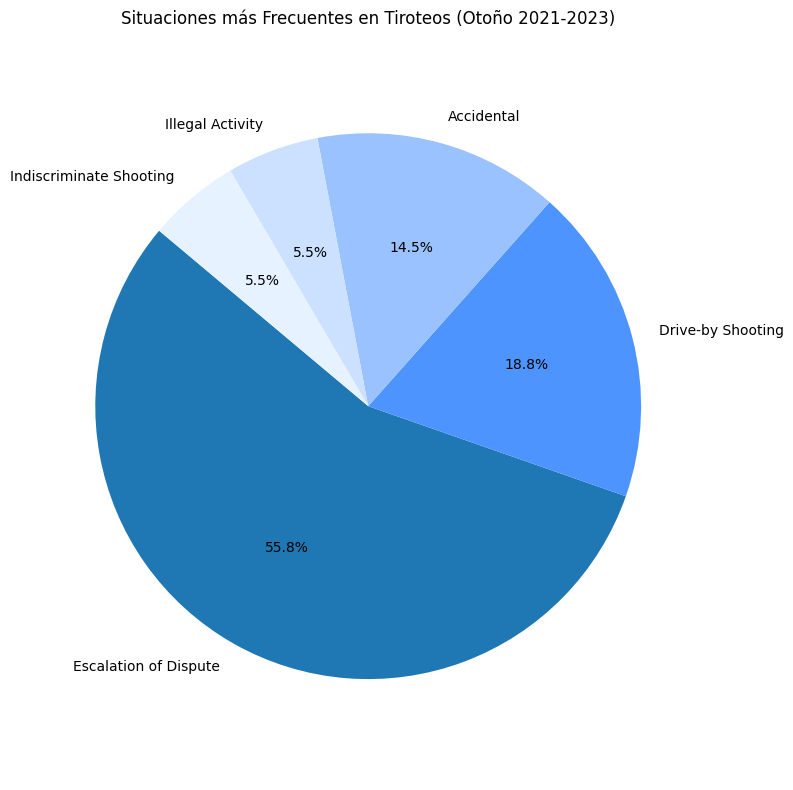

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Year' a tipo datetime para filtrar
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Definir los meses de otoño
fall_months = [9, 10, 11]

# Filtrar los datos para los meses de otoño y los años 2021, 2022 y 2023
filtered_data = data[data['Year'].dt.year.isin([2021, 2022, 2023]) & data['Month'].isin(fall_months)]

# Contar las situaciones más frecuentes
top_situations = filtered_data['Situation'].value_counts().head(5)

# Preparar colores en tonos de azul de oscuro a claro
colors = ['#1f77b4', '#4d94ff', '#99c2ff', '#cce0ff', '#e6f2ff']

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(top_situations, labels=top_situations.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Situaciones más Frecuentes en Tiroteos (Otoño 2021-2023)')
plt.axis('equal')  # Para asegurar que el gráfico sea circular
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Filtrar datos desde 2021 hasta 2023
filtered_data = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar valores para cada característica
age_counts = filtered_data['Age'].value_counts().head(10)
gender_counts = filtered_data['Gender'].value_counts().head(10)
school_affiliation_counts = filtered_data['School_Affiliation'].value_counts().head(10)
weapon_type_counts = filtered_data['Weapon_Type'].value_counts().head(10)
situation_counts = filtered_data['Situation'].value_counts().head(10)

# Preparar la visualización
plt.figure(figsize=(12, 8))

# Graficar las características más comunes
plt.subplot(2, 3, 1)
age_counts.plot(kind='barh', color='blue')
plt.title('Edad del Tirador')

plt.subplot(2, 3, 2)
gender_counts.plot(kind='barh', color='blue')
plt.title('Género del Tirador')

plt.subplot(2, 3, 3)
school_affiliation_counts.plot(kind='barh', color='blue')
plt.title('Afiliación Escolar del Tirador')

plt.subplot(2, 3, 4)
weapon_type_counts.plot(kind='barh', color='blue')
plt.title('Tipo de Arma Usada')

plt.subplot(2, 3, 5)
situation_counts.plot(kind='barh', color='blue')
plt.title('Situación del Tiroteo')

plt.tight_layout()
plt.show()


KeyError: 'Age'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data.csv'
data = pd.read_csv(file_path)

# Mostrar las primeras filas para entender la estructura de los datos
print(data.head())

# Listar las columnas disponibles en el dataset
print(data.columns)


     Incident_ID  Month  Day  Year        Date  \
0  20240326GATUA      3   26  2024  2024-03-26   
1  20240326MOCHC      3   26  2024  2024-03-26   
2  20240326NJWEN      3   26  2024  2024-03-26   
3  20240325HIWAW      3   25  2024  2024-03-25   
4  20240321NJMAN      3   21  2024  2024-03-21   

                                 School  Victims_Killed  Victims_Wounded  \
0             Turner County High School               0                0   
1  Charleston Junior Senior High School               0                0   
2                 West Side High School               0                2   
3             Wailuku Elementary School               0                1   
4         Malcolm X Shabazz High School               1                0   

   Number_Victims  Shooter_Killed  ... Bullied  Domestic_Violence  \
0               0               0  ...      No                 No   
1               0               0  ...      No                 No   
2               2               0  

In [ ]:
import pandas as pd

# Ruta del archivo CSV
file_path = '/content/combined_data (1).csv'

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(data.head())

# Obtener información sobre las columnas y tipos de datos
print(data.info())


     Incident_ID  Month  Day  Year        Date  \
0  20240326GATUA      3   26  2024  2024-03-26   
1  20240326MOCHC      3   26  2024  2024-03-26   
2  20240326NJWEN      3   26  2024  2024-03-26   
3  20240325HIWAW      3   25  2024  2024-03-25   
4  20240321NJMAN      3   21  2024  2024-03-21   

                                 School  Victims_Killed  Victims_Wounded  \
0             Turner County High School               0                0   
1  Charleston Junior Senior High School               0                0   
2                 West Side High School               0                2   
3             Wailuku Elementary School               0                1   
4         Malcolm X Shabazz High School               1                0   

   Number_Victims  Shooter_Killed  ... Active_Shooter_FBI  Shots_Fired  \
0               0               0  ...                 No          NaN   
1               0               0  ...                 No            1   
2               2   

In [ ]:
import pandas as pd

# Ruta del archivo CSV
file_path = '/content/combined_data (1).csv'

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame para verificar la carga
print(data.head())

# Obtener información sobre las columnas y tipos de datos
print(data.info())

     Incident_ID  Month  Day  Year        Date  \
0  20240326GATUA      3   26  2024  2024-03-26   
1  20240326MOCHC      3   26  2024  2024-03-26   
2  20240326NJWEN      3   26  2024  2024-03-26   
3  20240325HIWAW      3   25  2024  2024-03-25   
4  20240321NJMAN      3   21  2024  2024-03-21   

                                 School  Victims_Killed  Victims_Wounded  \
0             Turner County High School               0                0   
1  Charleston Junior Senior High School               0                0   
2                 West Side High School               0                2   
3             Wailuku Elementary School               0                1   
4         Malcolm X Shabazz High School               1                0   

   Number_Victims  Shooter_Killed  ... Active_Shooter_FBI  Shots_Fired  \
0               0               0  ...                 No          NaN   
1               0               0  ...                 No            1   
2               2   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos por los años 2021 a 2023
data_filtered = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Edad de Shooters (2021-2023)')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


TypeError: '<' not supported between instances of 'float' and 'str'

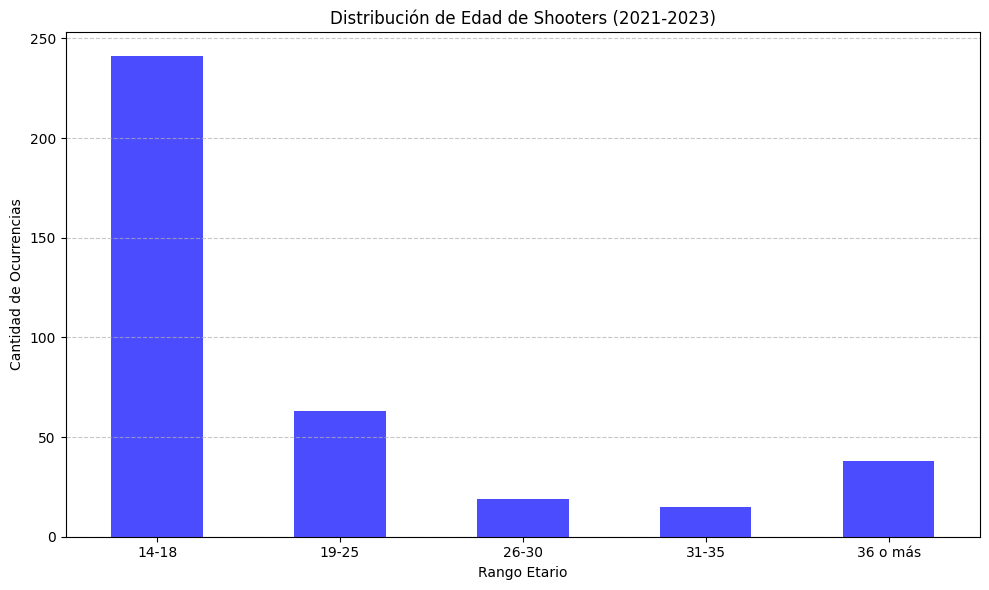

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos por los años 2021 a 2023
data_filtered = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Edad de Shooters (2021-2023)')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


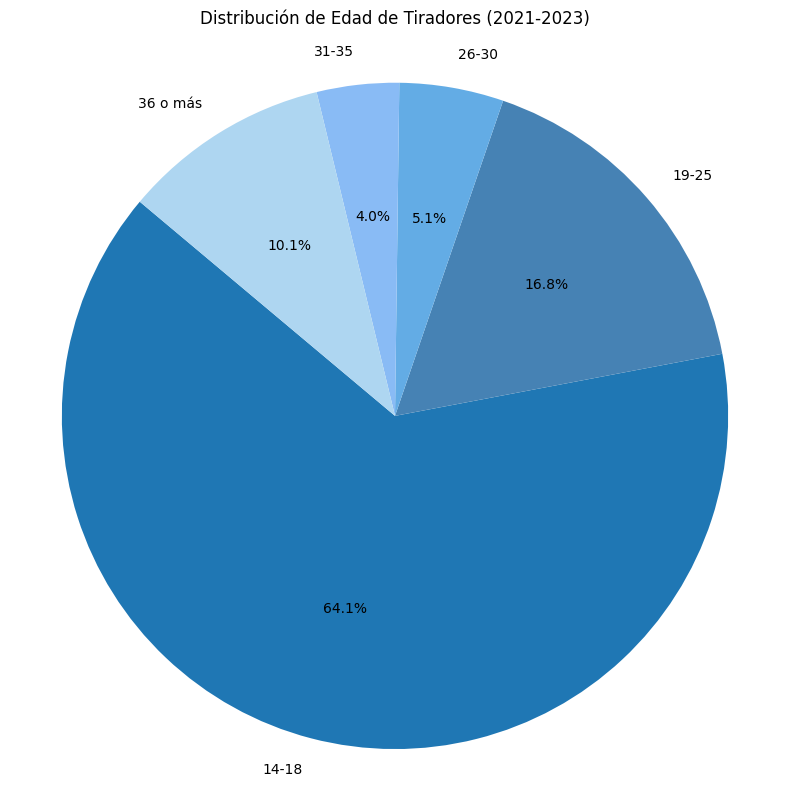

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos por los años 2021 a 2023
data_filtered = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Calcular porcentajes
age_percentages = (age_counts / age_counts.sum()) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#4682b4', '#63ace5', '#89bbf5', '#aed6f1']  # Tonos azules
plt.pie(age_percentages, labels=age_percentages.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de Edad de Tiradores (2021-2023)', pad=20)  # Aumentar la separación del título
plt.axis('equal')  # Para asegurar que el gráfico sea circular

# Mostrar el gráfico
plt.tight_layout()
plt.show()



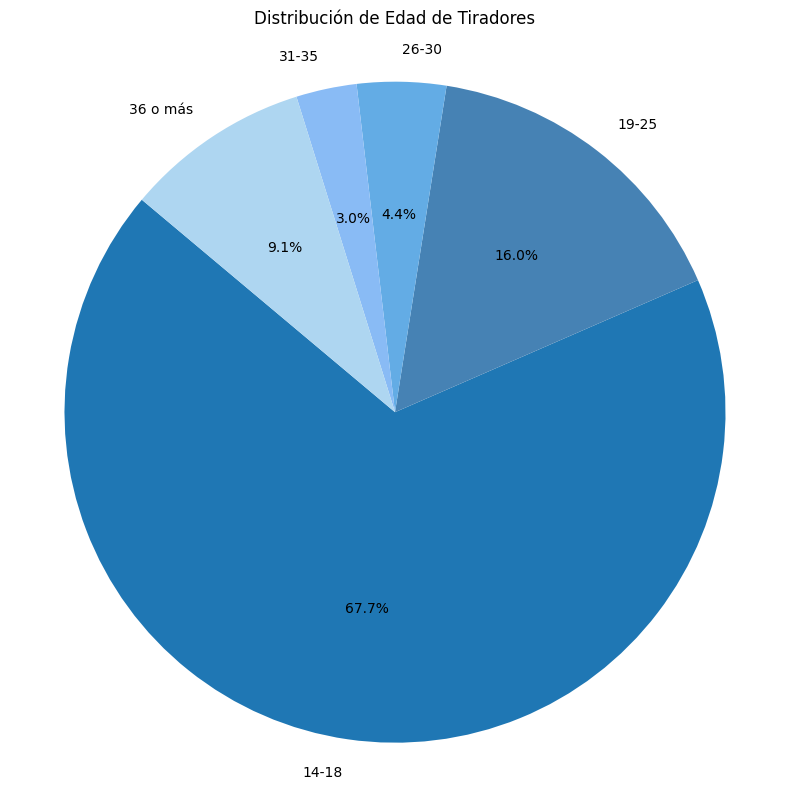

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data['Age Range'].value_counts().sort_index()

# Calcular porcentajes
age_percentages = (age_counts / age_counts.sum()) * 100

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#4682b4', '#63ace5', '#89bbf5', '#aed6f1']  # Tonos azules
plt.pie(age_percentages, labels=age_percentages.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribución de Edad de Tiradores', pad=20)  # Aumentar la separación del título
plt.axis('equal')  # Para asegurar que el gráfico sea circular

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-61-a657daab379b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ca['Age'] = pd.to_numeric(data_ca['Age'], errors='coerce')
<ipython-input-61-a657daab379b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ca['Age Range'] = pd.cut(data_ca['Age'], bins=bins, labels=labels, right=False)


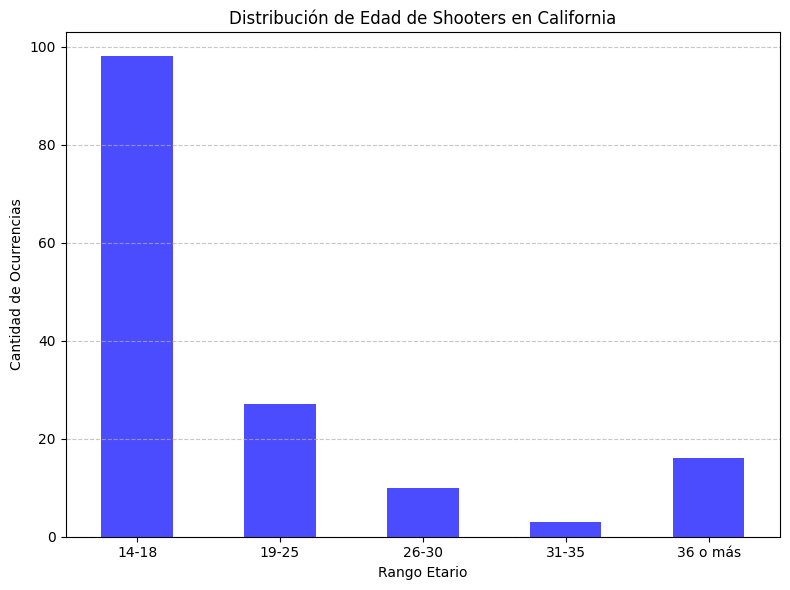

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Filtrar los datos para California
data_ca = data[data['State'] == 'CA']

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data_ca['Age'] = pd.to_numeric(data_ca['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data_ca['Age Range'] = pd.cut(data_ca['Age'], bins=bins, labels=labels, right=False)

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts_ca = data_ca['Age Range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
age_counts_ca.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Edad de Shooters en California')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


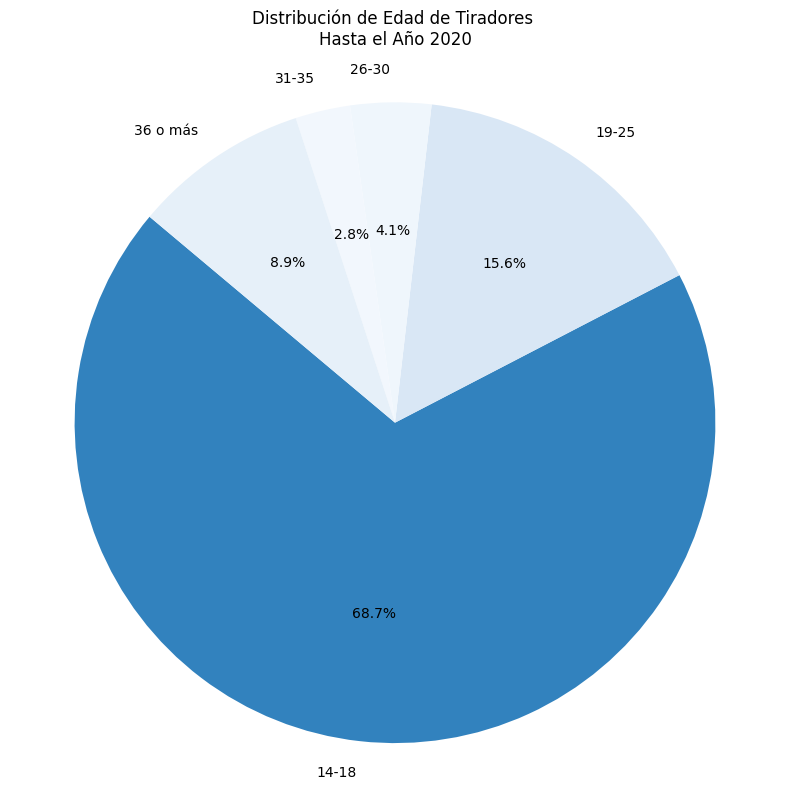

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para años hasta 2020
data_until_2020 = data[data['Year'] <= 2020]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_until_2020['Age Range'].value_counts().sort_index()

# Calcular los porcentajes
age_percentages = (age_counts / age_counts.sum()) * 100

# Invertir el orden de los colores en tonos de azul
colors = plt.cm.Blues(age_percentages / 100)

# Crear el gráfico circular con porcentajes
plt.figure(figsize=(8, 8))
plt.pie(age_percentages, labels=age_percentages.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Edad de Tiradores \nHasta el Año 2020', pad=20)  # Aumenta el espacio del título
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()


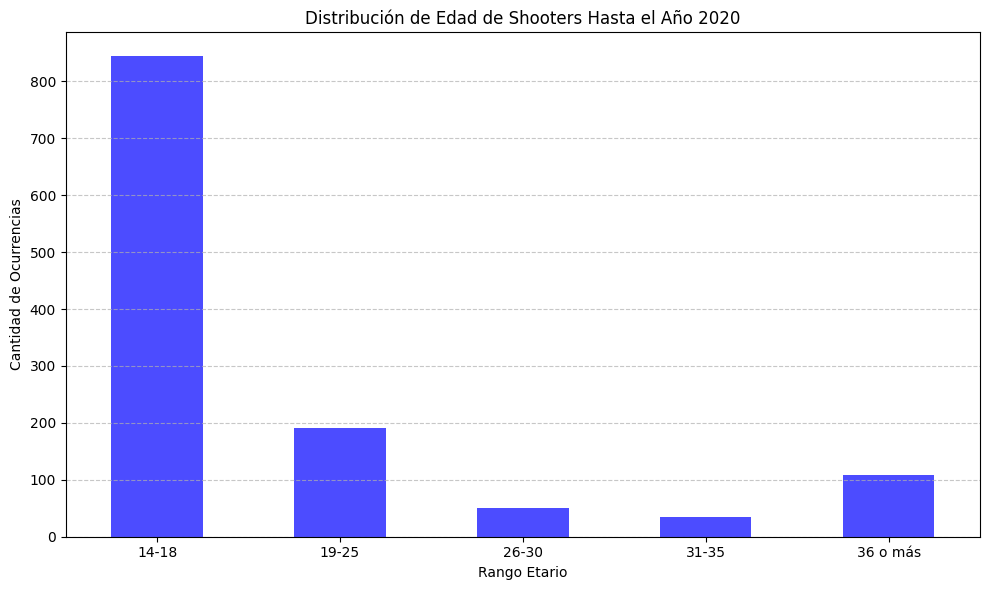

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para años hasta 2020
data_until_2020 = data[data['Year'] <= 2020]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_until_2020['Age Range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Edad de Shooters Hasta el Año 2020')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


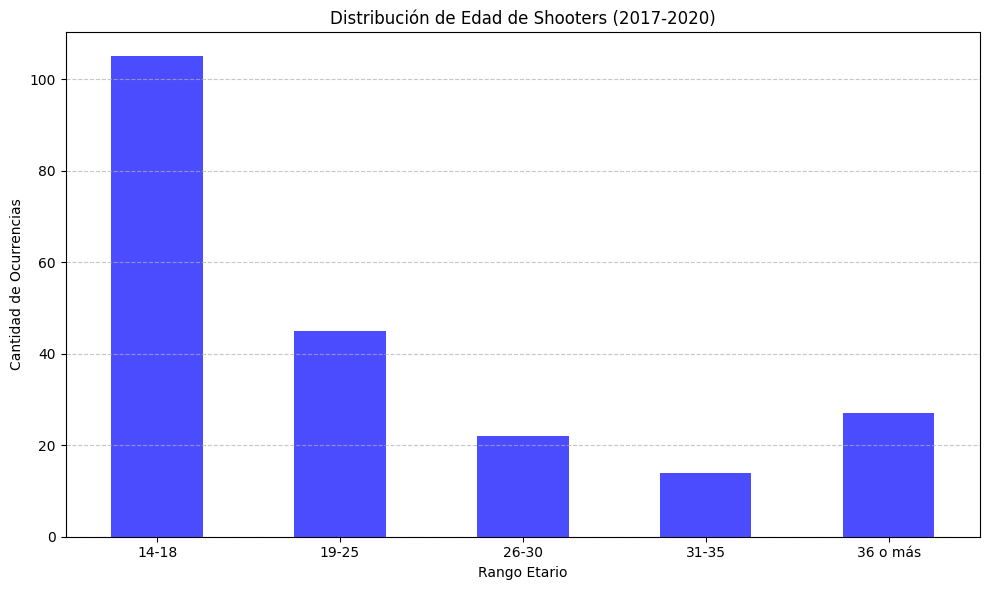

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para los años 2017 a 2020
data_filtered = data[(data['Year'] >= 2017) & (data['Year'] <= 2020)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribución de Edad de Shooters (2017-2020)')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<ipython-input-84-c678cd76e1f6>:27: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




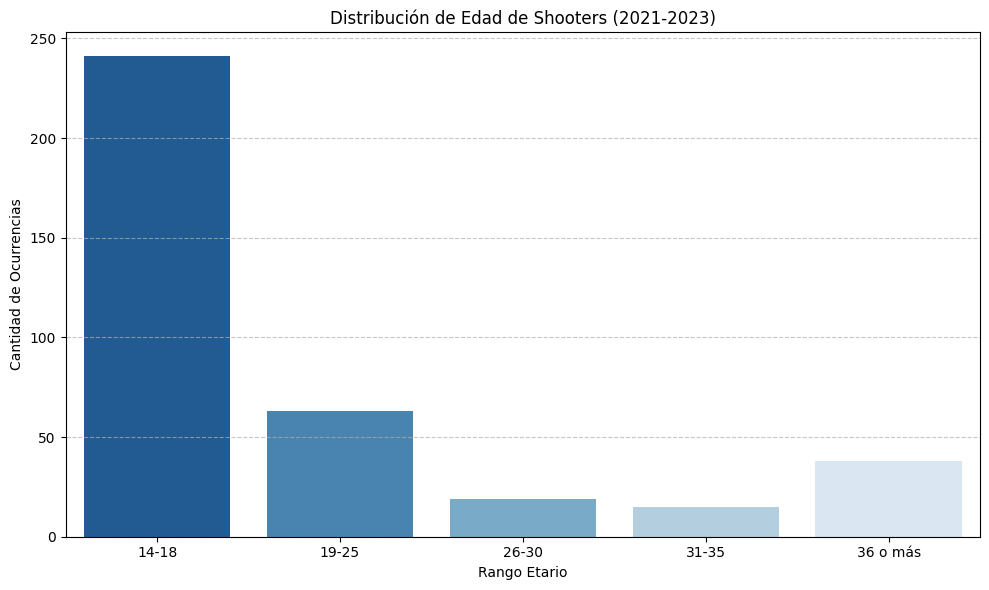

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para los años 2021 a 2023
data_filtered = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=age_counts.index, y=age_counts.values, palette='Blues_r')
plt.title('Distribución de Edad de Shooters (2021-2023)')
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de Ocurrencias')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para los años 2017 a 2020
data_filtered = data[(data['Year'] >= 2017) & (data['Year'] <= 2020)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Crear el gráfico interactivo con Plotly
fig = px.bar(age_counts, x=age_counts.index, y=age_counts.values,
             labels={'x': 'Rango Etario', 'y': 'Cantidad de Ocurrencias'},
             title='Distribución de Edad de Shooters (2017-2020)',
             color_discrete_sequence=['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#eff3ff'])

# Configuración del diseño
fig.update_layout(
    title_x=0.5,  # Centrar el título horizontalmente
    xaxis_title='Rango Etario',
    yaxis_title='Cantidad de Ocurrencias',
    uniformtext_minsize=8,  # Tamaño mínimo del texto uniforme
    uniformtext_mode='hide',  # Ocultar el texto uniforme por defecto
    bargap=0.2,  # Espacio entre las barras
)

# Mostrar el gráfico interactivo
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Cargar el archivo CSV
file_path = '/content/combined_data (1).csv'
data = pd.read_csv(file_path)

# Convertir la columna 'Age' a numérica, forzando errores a NaN
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Definir los rangos etarios
bins = [14, 19, 26, 31, 36, float('inf')]
labels = ['14-18', '19-25', '26-30', '31-35', '36 o más']

# Crear la columna 'Age Range' basada en los bins y labels definidos
data['Age Range'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Filtrar los datos para los años 2021 a 2023
data_filtered = data[(data['Year'] >= 2021) & (data['Year'] <= 2023)]

# Contar la cantidad de veces que se repiten los rangos etarios
age_counts = data_filtered['Age Range'].value_counts().sort_index()

# Crear el gráfico interactivo con Plotly
fig = px.bar(age_counts, x=age_counts.index, y=age_counts.values,
             labels={'x': 'Rango Etario', 'y': 'Cantidad de Ocurrencias'},
             title='Distribución de Edad de Shooters (2021-2023)',
             color_discrete_sequence=['#3182bd', '#6baed6', '#9ecae1', '#c6dbef', '#eff3ff'])

# Configuración del diseño
fig.update_layout(
    title_x=0.5,  # Centrar el título horizontalmente
    xaxis_title='Rango Etario',
    yaxis_title='Cantidad de Ocurrencias',
    uniformtext_minsize=8,  # Tamaño mínimo del texto uniforme
    uniformtext_mode='hide',  # Ocultar el texto uniforme por defecto
    bargap=0.2,  # Espacio entre las barras
)

# Mostrar el gráfico interactivo
fig.show()
